In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Write the test hypotheses.
Null  - the woman successfully identified the tea by chance. 
Alterntive - the woman was able to successfully determine if milk or tea went first.

Step 2: Determine a test statistic.
She has to get several of them right. |Right answer | shuffle her answers|=> see how many is right

Step 3: Determine a distribution of the test statistic.

Number Correct,count
0,133
2,2269
4,5131
6,2335
8,132


C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


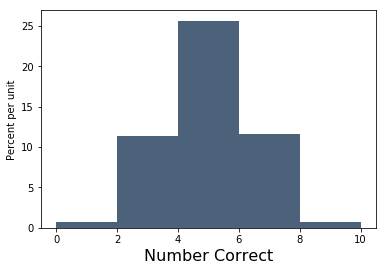

In [2]:
TeaTable=Table().with_column('True/False',[1,1,1,1,0,0,0,0])
#Now we go through and shuffle her results.
numberRight=[]
for i in np.arange(10000):
    numberRight.append(sum(TeaTable.column('True/False')==TeaTable.sample(k=8,with_replacement=False).column(0)))
TableRight=Table().with_column('Number Correct',numberRight)
GroupingRight=TableRight.group(0)
GroupingRight.show()
TableRight.hist(bins=np.arange(0,12, 2))

Step 4: make a decision

In [3]:
#Calculate p value:
pvalue=GroupingRight.where('Number Correct',are.above(4)).column(1).sum()/10000
pvalue

0.2467

Given that the p value is much greater than .05, we conclude that the probability she was able to accurately guess 6/8 correct is high enough that we cannot reject the null hypothesis. That is, it's entirely possible she guessed 6/8 correct and does not have the ability to taste test it. 

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [4]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: 
Alternative: virginica specicies has a larger mean sepal width than that of versicolor.
Null: virginica has less than or equal to the mean sepal width of versicolor. 

Step 2: test statistic is the difference of the averages between versicolor and virginica sepal width.
For curiousity we will also find the statistic of the average of the differences.

Step 3: Determine distribution of test statistic

In [5]:
#Difference of the averages
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [49]:
#Average of the differences
Side_data=iris_sub.where(0,are.not_containing('versicolor'))
Versicolor_data=iris_sub.where(0,are.not_containing('virginica'))
Side_data=Side_data.with_column('Flower name',Versicolor_data.column(0)).with_column('Versicolor sepal width',Versicolor_data.column(1))
Side_data.relabel('sepal_width','virginica sepal width')
Table_of_widths=Side_data.select('Versicolor sepal width','virginica sepal width')
Table_with_diffs=Table_of_widths.with_column('versicolor-virginica',Table_of_widths.column(1)-Table_of_widths.column(0))
print('Average of the differences:',np.mean(Table_with_diffs.column(2)))
Table_with_diffs

Average of the differences: 0.20400000000000007


Versicolor sepal width,virginica sepal width,versicolor-virginica
3.2,3.3,0.1
3.2,2.7,-0.5
3.1,3,-0.1
2.3,2.9,0.6
2.8,3,0.2
2.8,3,0.2
3.3,2.5,-0.8
2.4,2.9,0.5
2.9,2.5,-0.4
2.7,3.6,0.9


Based on the above average of the differences, we should expect after numerous simulations, if the null were true, we should expect the mean of the differences to be greater than 0.

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


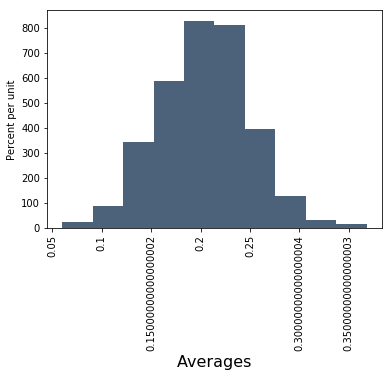

In [8]:
Means=[]
for i in np.arange(1000):
    shuffledVirgin=Table_of_widths.select('virginica sepal width').sample(k=Table_of_widths.num_rows,with_replacement=True)
    Differences=(Versicolor_data.column(1)-shuffledVirgin.column(0))*-1
    AverageDifference=np.mean(Differences)
    Means.append(AverageDifference)
Table().with_column('Averages',Means).hist()

In [9]:
np.count_nonzero(np.array(Means)>=.204)/1000

0.508

Now we are going to try shuffling both of the columns instead of just one.

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


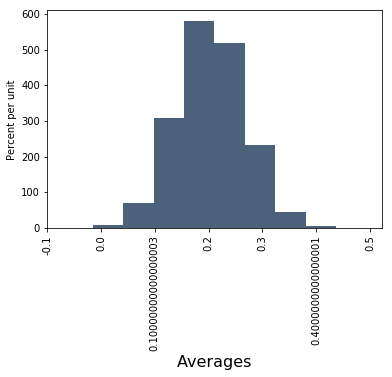

In [56]:
Means=[]
for i in np.arange(100000):
    shuffledVirgin=Table_of_widths.select('virginica sepal width').sample(k=Table_of_widths.num_rows,with_replacement=True)
    shuffledVersicolor=Table_of_widths.select('Versicolor sepal width').sample(k=Table_of_widths.num_rows,with_replacement=True)
    Differences=(shuffledVersicolor.column(0)-shuffledVirgin.column(0))*-1
    AverageDifference=np.mean(Differences)
    Means.append(AverageDifference)
Table().with_column('Averages',Means).hist()

In [60]:
print('Probability of getting greater than or equal to .204 average difference:',np.count_nonzero(np.array(Means)>=.204)/1000)
(np.count_nonzero(np.array(Means)<=0)/100000)*100 #How many times did we get a difference less than 0?

Probability of getting greater than or equal to .204 average difference: 50.344


0.043

After enough trials, the probability of getting difference less than or equal to zero is extremely small. That is, this only occurred 43 times in 100,000 trials. While the probability of getting an average difference greater than .204 happens 50% of the time, the probability that the versicolor has a larger sepal width, is highly unlikely, and based on our understanding, it is possible to reject the null, that is, the average of the differences occurred by chance.

Now a difference from above, instead of finding the average of the differences, we're going to find the difference of the averages.

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


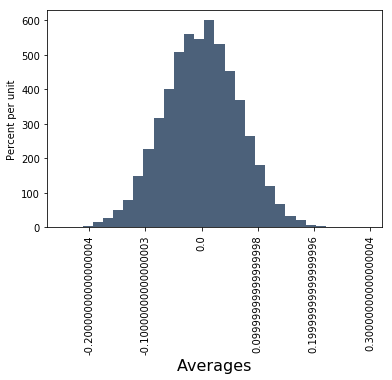

In [44]:
Difference_of_averages=[]
for i in np.arange(10000):
    sampled_Virgin=iris_sub.select(1).sample(k=Table_of_widths.num_rows,with_replacement=True)
    sampled_Versicolor=iris_sub.select(1).sample(k=Table_of_widths.num_rows,with_replacement=True)
    Difference_of_average=(np.mean(sampled_Virgin.column(0))-np.mean(sampled_Versicolor.column(0)))
    Difference_of_averages=np.append(Difference_of_averages,Difference_of_average)
Table().with_column('Averages',Difference_of_averages).hist(overlay=False,bins=30)

In [45]:
(sum(np.array(Difference_of_averages)>=.2039)/10000)

0.0011

Step 4: Make decisions

Considering that the probability of getting a value greater than .2039 occurs less than .11 percent of the time based on our final method of measuring. Therefore, we consider this siginificant enough to reject the null hypothesis.